NO3 Plate Processing

In [254]:
#install.packages('tibble')

In [255]:
library(readxl)
library(tidyverse)
library(dplyr)
library(ggplot2)

In [256]:
getwd()

[1] "/Users/brookesienkiewicz/Documents/LabNotebook/Nutrients"

In [257]:
# load plate raws 
test <- read_excel("plate_results/stnd_test2.xlsx")

New names:
• `` -> `...3`
• `` -> `...4`
• `` -> `...5`
• `` -> `...6`
• `` -> `...7`
• `` -> `...8`
• `` -> `...9`
• `` -> `...10`
• `` -> `...11`
• `` -> `...12`
• `` -> `...13`
• `` -> `...14`
• `` -> `...15`


In [258]:
head(test)

Software Version,3.16.10,...3,...4,...5,...6,...7,...8,...9,...10,...11,...12,...13,...14,...15
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Experiment File Path:,C:\Users\Public\Documents\Experiments\sienkiewicz_winbourne\std_test.xpt,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Protocol File Path:,C:\Users\Public\Documents\Experiments\sienkiewicz_winbourne\nitrate_updated.prt,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Plate Number,Plate 3,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Date,45721,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA
Time,0.75908564814814816,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA,NA


In [259]:
options(scipen = 999)
options(digits = 5)  

In [260]:
# pull out raw results 
raw <-test %>%
    select(2:14) %>%
        slice(c(42:57)) %>%
# get rid of scientific notation
            mutate(across(everything(), ~ as.numeric(.))) %>% 
                mutate(across(everything(), ~ round(., 4))) 
head(raw)

Warning message:
“There was 1 warning in `mutate()`.
ℹ In argument: `across(everything(), ~as.numeric(.))`.
Caused by warning:
! NAs introduced by coercion”


3.16.10,...3,...4,...5,...6,...7,...8,...9,...10,...11,...12,...13,...14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,1.000,2.000,3.000,4.000,5.000,6.000,7.000,8.000,9.000,10.000,11.000,12.000
NA,0.079,0.098,0.082,0.092,0.145,0.114,0.121,0.066,0.847,0.474,0.125,0.079
NA,0.014,0.033,0.017,0.027,0.080,0.049,0.056,0.002,0.782,0.409,0.060,0.014
NA,0.070,0.086,0.112,0.168,0.310,0.614,0.964,0.064,0.846,0.484,0.118,0.077
NA,0.006,0.021,0.047,0.103,0.246,0.549,0.899,-0.001,0.781,0.419,0.054,0.012
NA,0.074,0.072,0.070,0.071,0.071,0.073,0.846,0.119,0.066,0.065,0.064,0.087


In [261]:
## data cleanup 
# fix colnames 
colnames(raw) <- raw[1, ]
colnames(raw)[1] <- "letter"
# remove first row 
raw <- raw[-1,]
# convert to df
raw <- as.data.frame(raw)
raw

letter,1,2,3,4,5,6,7,8,9,10,11,12
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
NA,0.079,0.098,0.082,0.092,0.145,0.114,0.121,0.066,0.847,0.474,0.125,0.079
NA,0.014,0.033,0.017,0.027,0.080,0.049,0.056,0.002,0.782,0.409,0.060,0.014
NA,0.070,0.086,0.112,0.168,0.310,0.614,0.964,0.064,0.846,0.484,0.118,0.077
NA,0.006,0.021,0.047,0.103,0.246,0.549,0.899,-0.001,0.781,0.419,0.054,0.012
NA,0.074,0.072,0.070,0.071,0.071,0.073,0.846,0.119,0.066,0.065,0.064,0.087
NA,0.010,0.007,0.005,0.006,0.006,0.008,0.781,0.054,0.002,0.000,-0.001,0.022
NA,0.080,0.071,0.072,0.068,0.066,0.067,0.478,0.064,0.064,0.064,0.064,0.098
NA,0.015,0.007,0.008,0.003,0.001,0.002,0.413,-0.001,-0.001,0.000,-0.001,0.033
NA,0.072,0.073,0.107,0.092,0.098,0.106,0.199,0.064,0.848,0.485,0.121,0.109


In [262]:
# rename rows with letter and letter_blank
n_rows <- nrow(raw)
letters_vec <- letters[1:((n_rows + 1) %/% 2)]
rownames(raw) <- paste0(rep(letters_vec, each = 2)[1:n_rows], 
                              c(rep(c("", "_blank"), length(letters_vec)), FALSE)[1:n_rows])
# remove first columns
raw <- raw[, -1]
raw

,1,2,3,4,5,6,7,8,9,10,11,12
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
a,0.079,0.098,0.082,0.092,0.145,0.114,0.121,0.066,0.847,0.474,0.125,0.079
a_blank,0.014,0.033,0.017,0.027,0.080,0.049,0.056,0.002,0.782,0.409,0.060,0.014
b,0.070,0.086,0.112,0.168,0.310,0.614,0.964,0.064,0.846,0.484,0.118,0.077
b_blank,0.006,0.021,0.047,0.103,0.246,0.549,0.899,-0.001,0.781,0.419,0.054,0.012
c,0.074,0.072,0.070,0.071,0.071,0.073,0.846,0.119,0.066,0.065,0.064,0.087
c_blank,0.010,0.007,0.005,0.006,0.006,0.008,0.781,0.054,0.002,0.000,-0.001,0.022
d,0.080,0.071,0.072,0.068,0.066,0.067,0.478,0.064,0.064,0.064,0.064,0.098
d_blank,0.015,0.007,0.008,0.003,0.001,0.002,0.413,-0.001,-0.001,0.000,-0.001,0.033
e,0.072,0.073,0.107,0.092,0.098,0.106,0.199,0.064,0.848,0.485,0.121,0.109


# Standard Test - processing 
- for now, not worring about the 'blank' reading by the plate reader
- didn't use the last 2 rows
- 3x **low (0 - 0.05 ppm)**
- and 2x **normal standards (0 - 1 ppm)**
- 2 duplicate test samples 
- 3x 3 QC checks using ERA standard 

In [263]:
# calculate standard curve of low stnd using linear model 
# pull out plate setup 
plate_setup<-test %>%
 select(2:14) %>%
        slice(c(22:36)) 

plate_setup <- as.data.frame(plate_setup)
head(plate_setup)

,3.16.10,...3,...4,...5,...6,...7,...8,...9,...10,...11,...12,...13,...14
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
1,A,STD1,STD2,STD3,STD4,STD5,STD6,STD7,BLK,QC:1,QC:2,QC:3,STD2
2,NA,0,5.0000000000000001E-3,0.01,0.02,0.03,0.04,0.05,NA,1,0.5,0.05,5.0000000000000001E-3
3,B,STDB1,STDB2,STDB3,STDB4,STDB5,STDB6,STDB7,BLK,QC:1,QC:2,QC:3,STD3
4,NA,0,0.02,0.05,0.1,0.2,0.5,1,NA,1,0.5,0.05,0.01
5,C,SPL1,SPL1,SPL1,SPL2,SPL2,SPL2,QC:1,QC:3,BLK,BLK,BLK,STD4
6,NA,NA,NA,NA,NA,NA,NA,1,0.05,NA,NA,NA,0.02


## Low 

In [264]:
# rename rows
n_rows <- nrow(plate_setup)
letters_vec <- letters[1:((n_rows + 1) %/% 2)]
rownames(plate_setup) <- paste0(rep(letters_vec, each = 2)[1:n_rows], 
                              c(rep(c("", "_blank"), length(letters_vec)), FALSE)[1:n_rows])

#remove first col 
plate_setup <- plate_setup[, -1]
#rename cols 
colnames(plate_setup) <- as.character(1:12)

In [265]:
plate_setup

,1,2,3,4,5,6,7,8,9,10,11,12
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
a,STD1,STD2,STD3,STD4,STD5,STD6,STD7,BLK,QC:1,QC:2,QC:3,STD2
a_blank,0,5.0000000000000001E-3,0.01,0.02,0.03,0.04,0.05,NA,1,0.5,0.05,5.0000000000000001E-3
b,STDB1,STDB2,STDB3,STDB4,STDB5,STDB6,STDB7,BLK,QC:1,QC:2,QC:3,STD3
b_blank,0,0.02,0.05,0.1,0.2,0.5,1,NA,1,0.5,0.05,0.01
c,SPL1,SPL1,SPL1,SPL2,SPL2,SPL2,QC:1,QC:3,BLK,BLK,BLK,STD4
c_blank,NA,NA,NA,NA,NA,NA,1,0.05,NA,NA,NA,0.02
d,SPL1,SPL1,SPL1,SPL2,SPL2,SPL2,QC:2,BLK,BLK,BLK,BLK,STD5
d_blank,NA,NA,NA,NA,NA,NA,0.5,NA,NA,NA,NA,0.03
e,STD1,STD2,STD3,STD4,STD5,STD6,STD7,BLK,QC:1,QC:2,QC:3,STD6


In [266]:
# convert numbers to numeric and get rid of scientific notation
plate_setup[grepl("blank", rownames(plate_setup)), ] <- 
  lapply(plate_setup[grepl("blank", rownames(plate_setup)), ], function(x) round(as.numeric(x), 4))

In [267]:
plate_setup

,1,2,3,4,5,6,7,8,9,10,11,12
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
a,STD1,STD2,STD3,STD4,STD5,STD6,STD7,BLK,QC:1,QC:2,QC:3,STD2
a_blank,0,0.005,0.01,0.02,0.03,0.04,0.05,NA,1,0.5,0.05,0.005
b,STDB1,STDB2,STDB3,STDB4,STDB5,STDB6,STDB7,BLK,QC:1,QC:2,QC:3,STD3
b_blank,0,0.02,0.05,0.1,0.2,0.5,1,NA,1,0.5,0.05,0.01
c,SPL1,SPL1,SPL1,SPL2,SPL2,SPL2,QC:1,QC:3,BLK,BLK,BLK,STD4
c_blank,NA,NA,NA,NA,NA,NA,1,0.05,NA,NA,NA,0.02
d,SPL1,SPL1,SPL1,SPL2,SPL2,SPL2,QC:2,BLK,BLK,BLK,BLK,STD5
d_blank,NA,NA,NA,NA,NA,NA,0.5,NA,NA,NA,NA,0.03
e,STD1,STD2,STD3,STD4,STD5,STD6,STD7,BLK,QC:1,QC:2,QC:3,STD6


In [268]:
low <- data.frame(id = unlist(plate_setup[1, 1:7]),
                    conc = unlist(plate_setup[2, 1:7]),
                    od = unlist(raw[1, 1:7]),
                    od2 = unlist(raw['e', 1:7])
                 )
low

,id,conc,od,od2
,<chr>,<chr>,<dbl>,<dbl>
1,STD1,0,0.079,0.072
2,STD2,0.005,0.098,0.073
3,STD3,0.01,0.082,0.107
4,STD4,0.02,0.092,0.092
5,STD5,0.03,0.145,0.098
6,STD6,0.04,0.114,0.106
7,STD7,0.05,0.121,0.199


In [269]:
#blank as std 1 (for 3rd rep)
low$od3 <- raw['a', 8] 
# rest of stds from 3rd rep  
low[2:7,'od3'] <- raw[seq(from = 1, to = 11, by = 2), 12]
low

,id,conc,od,od2,od3
,<chr>,<chr>,<dbl>,<dbl>,<dbl>
1,STD1,0,0.079,0.072,0.066
2,STD2,0.005,0.098,0.073,0.079
3,STD3,0.01,0.082,0.107,0.077
4,STD4,0.02,0.092,0.092,0.087
5,STD5,0.03,0.145,0.098,0.098
6,STD6,0.04,0.114,0.106,0.109
7,STD7,0.05,0.121,0.199,0.171


In [270]:
# check character types (all need to be numeric to run model)
str(low)

'data.frame':	7 obs. of  5 variables:
 $ id  : chr  "STD1" "STD2" "STD3" "STD4" ...
 $ conc: chr  "0" "0.005" "0.01" "0.02" ...
 $ od  : num  0.079 0.098 0.082 0.092 0.145 0.114 0.121
 $ od2 : num  0.072 0.073 0.107 0.092 0.098 0.106 0.199
 $ od3 : num  0.066 0.079 0.077 0.087 0.098 0.109 0.171


In [271]:
# convert concentration to numeric 
low$conc <- as.numeric(as.character(low$conc))

In [272]:
# calculate avg, standard deviation  and pivot 
low$avg_od <- rowMeans(low[, c("od", "od2", "od3")])

# pivot
low_long<-low %>% pivot_longer(cols = c("od", "od2", "od3"),
             names_to = 'rep',
             values_to = 'od')
# std dev
low_long <- low_long %>%
  group_by(id) %>%
  mutate(sd = sd(od)) %>%
  ungroup()

In [273]:
# create linear standard curve 
# lm(target(y) ~ predictor(x))
# normally concentration is predictor (x), absorbance is response variable (y)
# but since we need to predict concentration, switching variables. since they are a linear relationship this should be fine. 
# SO: conc ~ od means absorbance is predictor (x) and concentration is response (y)
low_model <- lm(conc ~ od, data = low_long)
# view summary stats (R-squared)
summary(low_model)


Call:
lm(formula = conc ~ od, data = low_long)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.01500 -0.00906 -0.00117  0.01000  0.02033 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) -0.02122    0.00808   -2.63    0.017 *  
od           0.42065    0.07473    5.63  0.00002 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.0111 on 19 degrees of freedom
Multiple R-squared:  0.625,	Adjusted R-squared:  0.605 
F-statistic: 31.7 on 1 and 19 DF,  p-value: 0.0000199


In [274]:
## use the averages for the curve 
low_avg_model <- lm(conc ~ avg_od, data = low_long)
summary(low_avg_model)


Call:
lm(formula = conc ~ avg_od, data = low_long)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.00620 -0.00603 -0.00403  0.00503  0.01416 

Coefficients:
            Estimate Std. Error t value    Pr(>|t|)    
(Intercept) -0.03582    0.00611   -5.86 0.000012132 ***
avg_od       0.56226    0.05722    9.83 0.000000007 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.00737 on 19 degrees of freedom
Multiple R-squared:  0.836,	Adjusted R-squared:  0.827 
F-statistic: 96.6 on 1 and 19 DF,  p-value: 0.00000000697


In [275]:
aic <- AIC(low_model, low_avg_model)
aic

,df,AIC
,<dbl>,<dbl>
low_model,3,-125.43
low_avg_model,3,-142.73


`geom_smooth()` using formula = 'y ~ x'


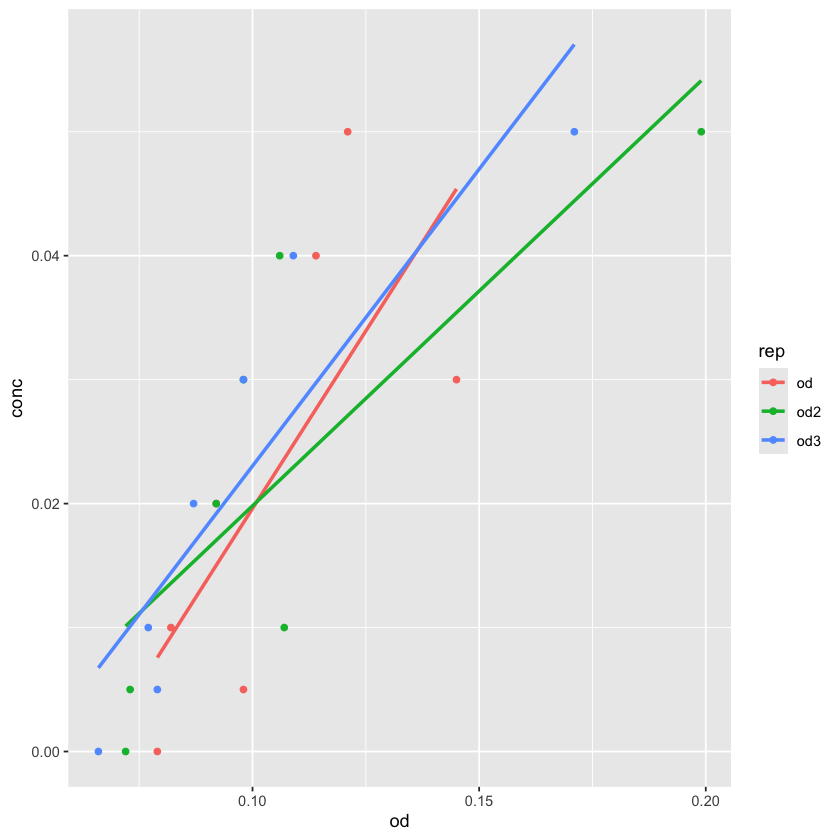

In [276]:
# Plot the data with the regression line
ggplot(low_long, aes(x = od, y = conc, color = rep)) +
       geom_point() +
       geom_smooth(method = "lm", se = FALSE)

`geom_smooth()` using formula = 'y ~ x'


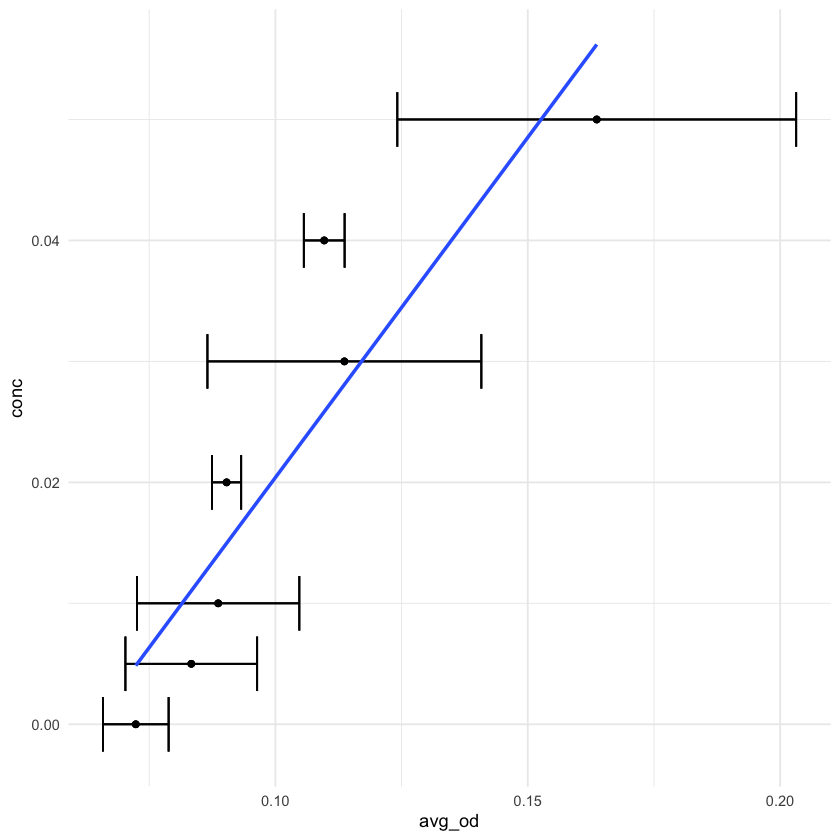

In [277]:
ggplot(low_long, aes(x = avg_od, y = conc)) + 
  geom_point() +  # Plot the average OD
  geom_errorbarh(aes(xmin = avg_od - sd, xmax = avg_od + sd)) +  # Add horizontal error bars
  geom_smooth(method = "lm", se = FALSE, linetype = "solid") +  # Add regression line
  theme_minimal()

In [278]:
sample_avg

sample,avg_od,predicted_conc,predicted_avg_conc,actual_conc
<chr>,<dbl>,<dbl>,<dbl>,<chr>
qc1,0.845800,0.4397329,0.4397329,1
qc2,0.481400,0.2348469,0.2348469,0.5
qc3,0.120400,0.0318726,0.0318726,0.05
s123,0.073167,0.0053153,0.0053153,NA
s159,0.069333,0.0031600,0.0031600,NA


In [279]:
# pull out sample data (samples, QCs, blanks) and use stnd curve to calculate concentrations

In [280]:
# samples
#S123: C & D 1-3 
#S159: C & D 4-6

s123 <- raw[c("c", "d"),1:3] %>%
    mutate(sample = 's123')
s159 <- raw[c("c", "d"),4:6] %>% 
    mutate(sample = 's159') 
names(s159) <- c(1,2,3,'sample')
samples <- rbind(s123, s159) %>%
    pivot_longer(cols = 1:3,
                names_to = 'rep',
                 values_to = 'od')
samples

sample,rep,od
<chr>,<chr>,<dbl>
s123,1,0.074
s123,2,0.072
s123,3,0.070
s123,1,0.080
s123,2,0.071
s123,3,0.072
s159,1,0.071
s159,2,0.071
s159,3,0.073


In [281]:
# QC1 (1ppm): A,B,E,F 9 & C7 
# QC2 (0.5 ppm): A,B,E,F 10 & D7 
# QC3 (0.05 ppm): A,B,E,F 11 & C8

qc1 <- data.frame(
  rep = c(1, 2, 3, 4, 5), # Replicate numbers
  od = c(raw["a", 9], raw["b", 9], raw["e", 9], raw["f", 9], raw["c", 7]), # Extract specific values
  sample = "qc1"
)

qc2 <- data.frame(
  rep = c(1, 2, 3, 4, 5),
  od = c(raw["a", 10], raw["b", 10], raw["e", 10], raw["f", 10], raw["d", 7]),
  sample = "qc2" 
)

qc3 <- data.frame(
  rep = c(1, 2, 3, 4, 5), 
  od = c(raw["a", 11], raw["b", 11], raw["e", 11], raw["f", 11], raw["c", 8]), 
  sample = "qc3" 
)

# Combine
qc_long <- bind_rows(qc1, qc2, qc3)

In [282]:
samples<-rbind(samples, qc_long)

In [283]:
samples <- samples %>%
    group_by(sample) %>%
    mutate(avg_od = mean(od)) %>% # Calculate mean within each group and add it as a new column
    mutate(sd_od = sd(od)) %>%
    ungroup() # Remove grouping for subsequent operations
samples

sample,rep,od,avg_od,sd_od
<chr>,<chr>,<dbl>,<dbl>,<dbl>
s123,1,0.074,0.073167,0.0036009
s123,2,0.072,0.073167,0.0036009
s123,3,0.070,0.073167,0.0036009
s123,1,0.080,0.073167,0.0036009
s123,2,0.071,0.073167,0.0036009
s123,3,0.072,0.073167,0.0036009
s159,1,0.071,0.069333,0.0027325
s159,2,0.071,0.069333,0.0027325
s159,3,0.073,0.069333,0.0027325


### predicted values based on averages (and lm average)

In [284]:
sample_avg<-samples %>% 
    group_by(sample) %>% 
        summarise(avg_od = mean(od))
sample_avg

sample,avg_od
<chr>,<dbl>
qc1,0.845800
qc2,0.481400
qc3,0.120400
s123,0.073167
s159,0.069333


In [285]:
sample_avg$predicted_avg_conc <- predict(low_avg_model, newdata = sample_avg)
sample_avg

sample,avg_od,predicted_avg_conc
<chr>,<dbl>,<dbl>
qc1,0.845800,0.4397329
qc2,0.481400,0.2348469
qc3,0.120400,0.0318726
s123,0.073167,0.0053153
s159,0.069333,0.0031600


In [286]:
sample_avg$actual_conc <- c('1','0.5','0.05',NA,NA)
sample_avg

sample,avg_od,predicted_avg_conc,actual_conc
<chr>,<dbl>,<dbl>,<chr>
qc1,0.845800,0.4397329,1
qc2,0.481400,0.2348469,0.5
qc3,0.120400,0.0318726,0.05
s123,0.073167,0.0053153,NA
s159,0.069333,0.0031600,NA


`geom_smooth()` using formula = 'y ~ x'


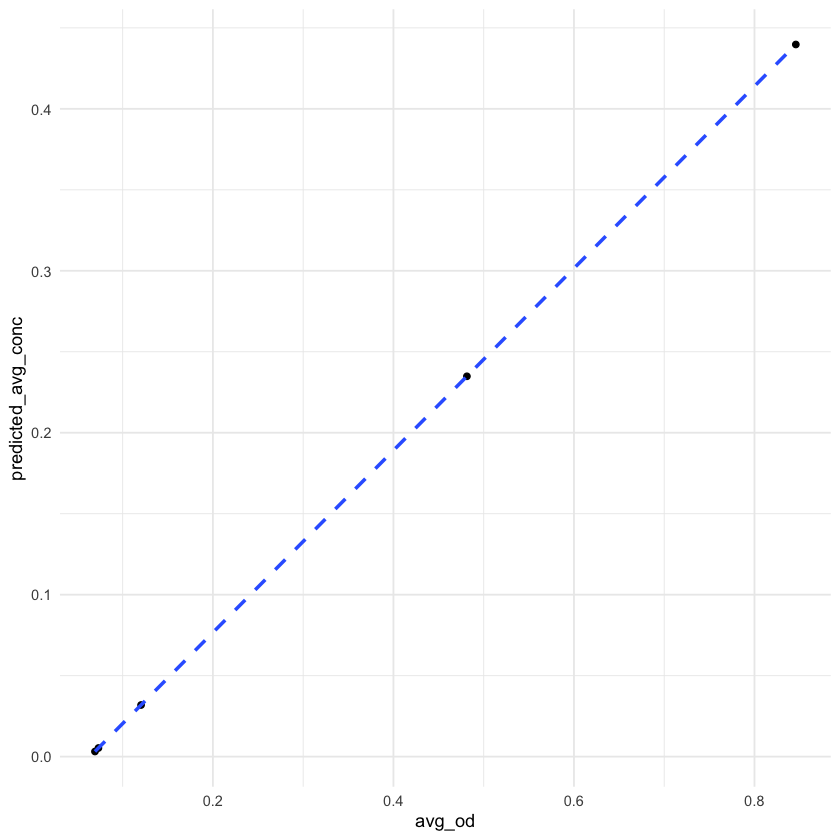

In [304]:
ggplot(sample_avg, aes(x = avg_od, y = predicted_avg_conc)) + 
  geom_point() +  # Plot the average OD
  #geom_errorbarh(aes(xmin = avg_od - sd, xmax = avg_od + sd)) +  # Add horizontal error bars
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") +  # Add regression line
  theme_minimal()


### predicted values based on individual od (lm model) 

In [288]:
# calculate concentrations
samples$predicted_conc <- predict(low_model, newdata = samples)
#calculate avgs and sd of predicted conc
samples<-samples %>%
    group_by(sample) %>%
        mutate(avg_predicted_conc = mean(predicted_conc)) %>%
        mutate(sd_predicted_conc = sd(predicted_conc)) %>%
            ungroup()

head(samples)

sample,rep,od,avg_od,sd_od,predicted_conc,avg_predicted_conc,sd_predicted_conc
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
s123,1,0.074,0.073167,0.0036009,0.0099040,0.0095535,0.0015147
s123,2,0.072,0.073167,0.0036009,0.0090627,0.0095535,0.0015147
s123,3,0.070,0.073167,0.0036009,0.0082214,0.0095535,0.0015147
s123,1,0.080,0.073167,0.0036009,0.0124279,0.0095535,0.0015147
s123,2,0.071,0.073167,0.0036009,0.0086421,0.0095535,0.0015147
s123,3,0.072,0.073167,0.0036009,0.0090627,0.0095535,0.0015147


In [302]:
# calculate % error for qcs (individually, by rep)
# make lists to loop through 
qc_list <- c('qc1','qc2','qc3')
expected_conc <- c(1,0.5,0.05)

# Add a percent_error column initialized with NA
samples <- samples %>%
  mutate(percent_error = NA_real_)

# Loop through each QC sample
for (q in c(1:3)) {
  # Update percent_error for matching QC samples and set others to NA
  samples <- samples %>%
    mutate(percent_error = ifelse(
      sample == qc_list[q],  # Only apply to matching QC samples
      (abs(predicted_conc - expected_conc[q]) / expected_conc[q]) * 100,  # Calculate % error
      percent_error  # For non-matching rows, retain NA
    ))
}
tail(samples)

sample,rep,od,avg_od,sd_od,predicted_conc,avg_predicted_conc,sd_predicted_conc,percent_error
<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
qc2,5,0.478,0.4814,0.0051769,0.179845,0.181276,0.0021776,64.031
qc3,1,0.125,0.1204,0.0027928,0.031357,0.029422,0.0011748,37.286
qc3,2,0.118,0.1204,0.0027928,0.028413,0.029422,0.0011748,43.175
qc3,3,0.121,0.1204,0.0027928,0.029674,0.029422,0.0011748,40.651
qc3,4,0.119,0.1204,0.0027928,0.028833,0.029422,0.0011748,42.334
qc3,5,0.119,0.1204,0.0027928,0.028833,0.029422,0.0011748,42.334


`geom_smooth()` using formula = 'y ~ x'


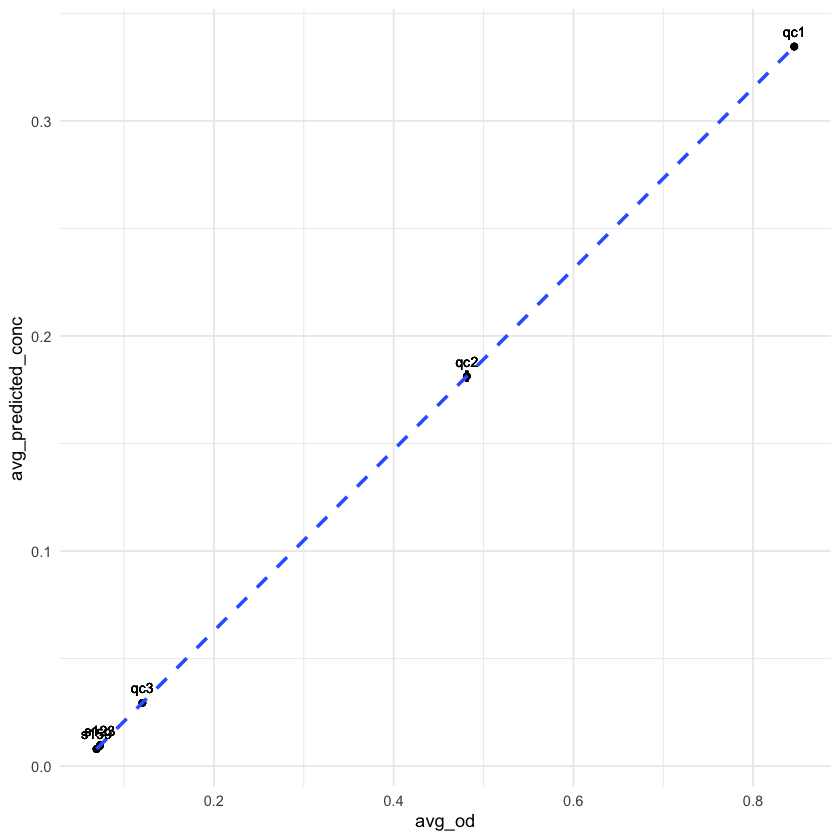

In [311]:
ggplot(samples, aes(x = avg_od, y = avg_predicted_conc)) + 
  geom_point() +  # Plot the average OD
  geom_errorbar(aes(ymin = avg_predicted_conc - sd_predicted_conc, ymax = avg_predicted_conc + sd_predicted_conc)) + 
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") + 
  geom_text(aes(label = sample), vjust = -1, hjust = 0.5, size = 3) +  # sample labels 
  theme_minimal()

`geom_smooth()` using formula = 'y ~ x'


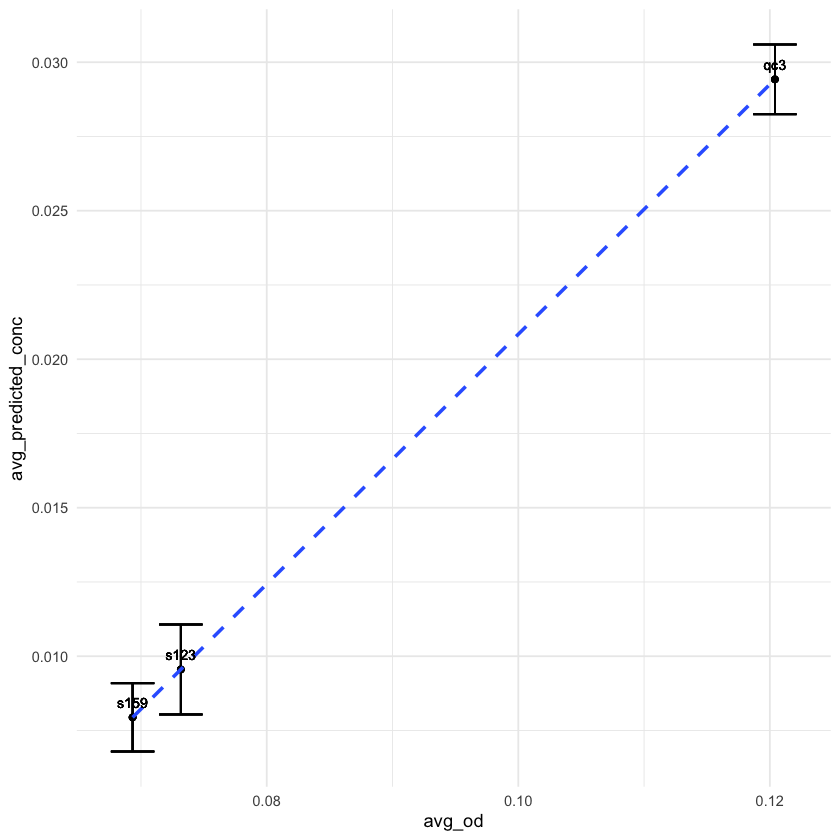

In [314]:
# zoom in on samples 
samples_noq <- samples %>%
    filter(!sample %in% c('qc1', 'qc2'))

ggplot(samples_noq, aes(x = avg_od, y = avg_predicted_conc)) + 
  geom_point() +  # Plot the average OD
  geom_errorbar(aes(ymin = avg_predicted_conc - sd_predicted_conc, ymax = avg_predicted_conc + sd_predicted_conc)) + 
  geom_smooth(method = "lm", se = FALSE, linetype = "dashed") + 
  geom_text(aes(label = sample), vjust = -1, hjust = 0.5, size = 3) +  # sample labels 
  theme_minimal()